# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [2]:
# TODO: Normalize MNIST dataset and rescale the data
# Load the MNIST dataset and normalize the features so that each value is in the range [0,1]
mnist = fetch_openml('mnist_784', version=1)
# Rescale the data
X, y = mnist.data.to_numpy() / 255., mnist.target.to_numpy()

d:\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [22]:
# Randomly permute the data and split it into training and test sets, taking the first 500
# data samples as training and the rest as test.
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# Print the labels and their frequencies in the training dataset.
print("Labels and their frequencies in the training dataset: ")
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

Labels and their frequencies in the training dataset: 
0: 44
1: 72
2: 50
3: 65
4: 54
5: 37
6: 52
7: 46
8: 35
9: 45


We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [23]:
def plot_digit(X_matrix, labels, index):
    """
    Plots a digit from the X_matrix and prints the corresponding label.
    Args:
    X_matrix (numpy.ndarray): Matrix of digit images.
    labels (numpy.ndarray): Array of digit labels.
    index (int): Index of the digit to plot and print.
    """
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


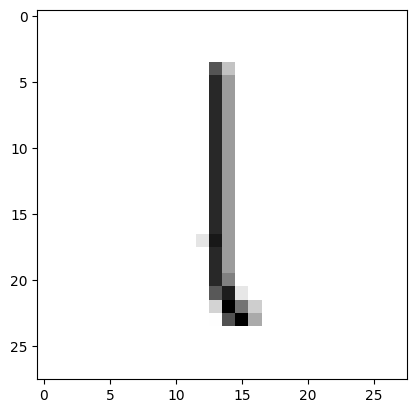

LABEL: 1
INPUT:


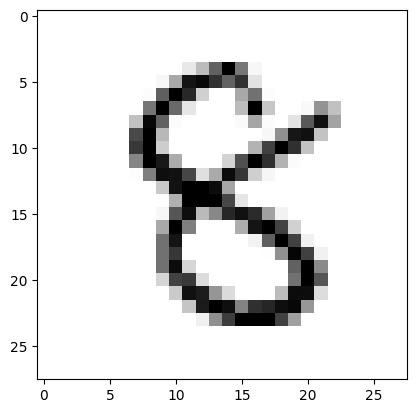

LABEL: 8


In [9]:
# Plot the 100th digit in the training set
plot_digit(X_train, y_train, 100)

# Plot the 40,000th digit in the test set
plot_digit(X_test, y_test,40000)

## Section 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the linear_grid search we suggest you use gridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [24]:
# Import the Support Vector Classifier (SVC) and gridSearchCV modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set the parameters for the linear SVM
parameters = {'C': [1, 10, 100]}

# Create a linear SVM object
linear_SVM = SVC(kernel='linear')

# TODO: Find the best model using 5-fold cross-validation and train it using all the training data
linear_grid = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5, refit=True)
linear_grid.fit(X_train, y_train)

# Print the results for the linear kernel
print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# TODO
print(linear_grid.best_params_)

print("Score with best parameters:")
# TODO
print(linear_grid.best_score_)

print("\nAll scores on the grid:")
# TODO
print(linear_grid.cv_results_['mean_test_score'])

# Set the parameters for the polynomial kernel with degree 2
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}
# Create a polynomial kernel with degree 2 SVM object
poly2_SVM = SVC(kernel='poly', degree=2)

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
poly_grid = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=5, refit=True)
poly_grid.fit(X_train, y_train)
# Print the results for the polynomial kernel with degree 2
print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# TODO
print(poly_grid.best_params_)

print("Score with best parameters:")
# TODO
print(poly_grid.best_score_)

print("\nAll scores on the grid:")
# TODO
print(poly_grid.cv_results_['mean_test_score'])

# Set the parameters for the RBF kernel
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

# Create an RBF kernel SVM object
rbf_SVM = SVC(kernel='rbf')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
rbf_grid = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5, refit=True)
rbf_grid.fit(X_train, y_train)
# Print the results for the RBF kernel
print('\nRESULTS FOR RBF KERNEL\n')

print("Best parameters set found:")
# TO DO
print(rbf_grid.best_params_)

print("Score with best parameters:")
# TO DO
print(rbf_grid.best_score_)

print("\nAll scores on the grid:")
# TO DO
print(rbf_grid.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.828

All scores on the grid:
[0.828 0.828 0.828]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.828

All scores on the grid:
[0.79  0.828 0.828 0.828 0.828 0.828 0.828 0.828 0.828]

RESULTS FOR RBF KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8539999999999999

All scores on the grid:
[0.844 0.324 0.144 0.854 0.36  0.144 0.854 0.36  0.144]


## Section 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [25]:
# Get the best SVM model from cross-validation
best_SVM = rbf_grid.best_estimator_ # TODO

# Fit the model on the entire training set
best_SVM.fit(X_train, y_train)

# Get the training and test error
training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

# Print the training and test error for the best SVM model
print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.105640


## Use logistic regression for comparison

## Section 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [26]:
from sklearn import linear_model

# Create a logistic regression object
lr = linear_model.LogisticRegression(max_iter=1000)

# TODO: Fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

# Compute the training and test error for the logistic regression model
training_error = 1. - lr.score(X_train, y_train) # TODO
test_error = 1. - lr.score(X_test, y_test) # TODO

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)

# Use logistic regression with 5-fold cross-validation
# You can use linear_model.LogisticRegressionCV
# Use 5-fold cross-validation to find the best choice of the parameter, then train
# the model on the entire training set

lr_cv = linear_model.LogisticRegressionCV(cv=5, max_iter=1000) # TODO
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train, y_train) # TODO
test_error_cv = 1. - lr_cv.score(X_test, y_test) # TODO

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.154317
Best logistic regression training error: 0.002000
Best logistic regression test error: 0.151554


## Section 4 
Compare and comment the results from SVM and logistic regression.

Among SVM models RBF with parameters $ \{C = 10 , \gamma = 0.01 \} $ had the best test score and was chosen as best SVM. With this model, test error was 10.5\%. On the other hand, the best logistic regression model didn't reach less than 15\% in test error. Hence, SVM is doing better than logistic regression

## Section 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


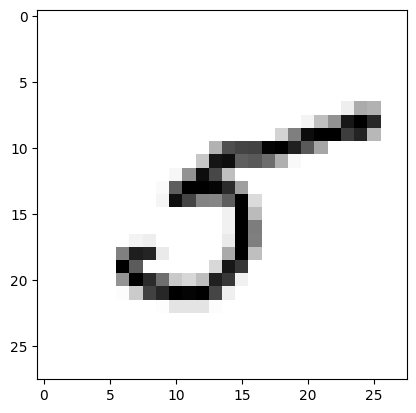

LABEL: 5
logistic regression: ['3']
best SVM : ['5']


In [35]:
# ADD CODE
for i in range(len(X_test)):
    x, y = X_test[i].reshape(1, -1), y_test[i]
    if lr_cv.predict(x) != y and best_SVM.predict(x) == y:
        plot_digit(X_test, y_test, i)
        print(f'logistic regression: {lr_cv.predict(x)}')
        print(f'best SVM : {best_SVM.predict(x)}')
        break

## More data
Now let's do the same but using 1000 data points for training. 

## Section 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

In [37]:
# TODO: Normalize MNIST dataset and rescale the data
# Load the MNIST dataset and normalize the features so that each value is in the range [0,1]
mnist = fetch_openml('mnist_784', version=1)
# Rescale the data
X, y = mnist.data.to_numpy() / 255., mnist.target.to_numpy()

d:\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [38]:
# Randomly permute the data and split it into training and test sets, taking the first 500
# data samples as training and the rest as test.
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# Print the labels and their frequencies in the training dataset.
print("Labels and their frequencies in the training dataset: ")
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

Labels and their frequencies in the training dataset: 
0: 108
1: 116
2: 98
3: 93
4: 106
5: 99
6: 96
7: 102
8: 91
9: 91


In [39]:
# Import the Support Vector Classifier (SVC) and gridSearchCV modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set the parameters for the linear SVM
parameters = {'C': [1, 10, 100]}

# Create a linear SVM object
linear_SVM = SVC(kernel='linear')

# TODO: Find the best model using 5-fold cross-validation and train it using all the training data
linear_grid = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5, refit=True)
linear_grid.fit(X_train, y_train)

# Print the results for the linear kernel
print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# TODO
print(linear_grid.best_params_)

print("Score with best parameters:")
# TODO
print(linear_grid.best_score_)

print("\nAll scores on the grid:")
# TODO
print(linear_grid.cv_results_['mean_test_score'])

# Set the parameters for the polynomial kernel with degree 2
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}
# Create a polynomial kernel with degree 2 SVM object
poly2_SVM = SVC(kernel='poly', degree=2)

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
poly_grid = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=5, refit=True)
poly_grid.fit(X_train, y_train)
# Print the results for the polynomial kernel with degree 2
print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# TODO
print(poly_grid.best_params_)

print("Score with best parameters:")
# TODO
print(poly_grid.best_score_)

print("\nAll scores on the grid:")
# TODO
print(poly_grid.cv_results_['mean_test_score'])

# Set the parameters for the RBF kernel
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

# Create an RBF kernel SVM object
rbf_SVM = SVC(kernel='rbf')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
rbf_grid = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5, refit=True)
rbf_grid.fit(X_train, y_train)
# Print the results for the RBF kernel
print('\nRESULTS FOR RBF KERNEL\n')

print("Best parameters set found:")
# TO DO
print(rbf_grid.best_params_)

print("Score with best parameters:")
# TO DO
print(rbf_grid.best_score_)

print("\nAll scores on the grid:")
# TO DO
print(rbf_grid.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.865

All scores on the grid:
[0.865 0.865 0.865]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.89

All scores on the grid:
[0.861 0.889 0.889 0.89  0.889 0.889 0.889 0.889 0.889]

RESULTS FOR RBF KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.899

All scores on the grid:
[0.896 0.715 0.116 0.899 0.743 0.116 0.899 0.743 0.116]


In [40]:
# Get the best SVM model from cross-validation
best_SVM = rbf_grid.best_estimator_ # TODO

# Fit the model on the entire training set
best_SVM.fit(X_train, y_train)

# Get the training and test error
training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

# Print the training and test error for the best SVM model
print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.082058


In [41]:
from sklearn import linear_model

# Create a logistic regression object
lr = linear_model.LogisticRegression(max_iter=1000)

# TODO: Fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

# Compute the training and test error for the logistic regression model
training_error = 1. - lr.score(X_train, y_train) # TODO
test_error = 1. - lr.score(X_test, y_test) # TODO

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)

# Use logistic regression with 5-fold cross-validation
# You can use linear_model.LogisticRegressionCV
# Use 5-fold cross-validation to find the best choice of the parameter, then train
# the model on the entire training set

lr_cv = linear_model.LogisticRegressionCV(cv=5, max_iter=1000) # TODO
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train, y_train) # TODO
test_error_cv = 1. - lr_cv.score(X_test, y_test) # TODO

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.141391
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.144841


INPUT:


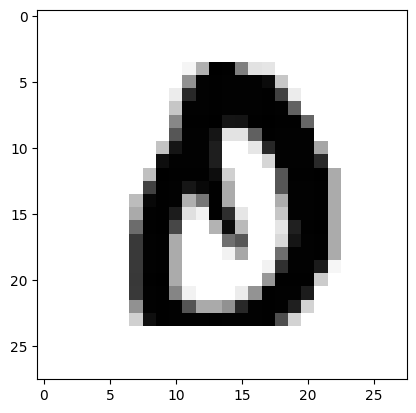

LABEL: 0
logistic regression: ['8']
best SVM : ['0']


In [42]:
# ADD CODE
for i in range(len(X_test)):
    x, y = X_test[i].reshape(1, -1), y_test[i]
    if lr_cv.predict(x) != y and best_SVM.predict(x) == y:
        plot_digit(X_test, y_test, i)
        print(f'logistic regression: {lr_cv.predict(x)}')
        print(f'best SVM : {best_SVM.predict(x)}')
        break

## Section 7
Compare and comment on the differences with the results above.

The best SVM model improved in test error by 2\% and reached 8\% error. Logistic regression model improved 1\% in test error and reached 14\%. Increasing train set, made the models more accurate. However, this better performance is less than the increase in data!